In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
N = 115*(10**6)
ma = 0.4
Boi = 1.2511 
Rsi = 510
Bgi = .00087

In [3]:
data = pd.read_excel('C:\\Users\\essa\\Desktop\\Data.xlsx')

In [4]:
data = pd.DataFrame(data)
data

,Pressure (Psia),Np (MMstb),Rp (scf/stb),Bo (scf/stb),Rs (scf/stb),Bg (rb/scf)
0,3330,NaN,NaN,1.2511,510,0.00087
1,3150,3.295,1050.0,1.2353,477,0.00092
2,3000,5.903,1060.0,1.2222,450,0.00096
3,2850,8.852,1160.0,1.2122,425,0.00101
4,2700,11.503,1235.0,1.2022,401,0.00107
5,2550,14.513,1265.0,1.1922,375,0.00113
6,2400,17.730,1300.0,1.1822,352,0.00120


In [5]:
data = data.iloc[1:,:].reset_index().drop('index', axis = 1)
data = data
P = data['Pressure (Psia)']
Np = data['Np (MMstb)']
Rp = data['Rp (scf/stb)']
Bo = data['Bo (scf/stb)']
Rs = data['Rs (scf/stb)']
Bg = data['Bg (rb/scf)']

data['F'] = Np*(Bo+(Rp-Rs)*Bg)
data['Eo'] = (Bo-Boi)+(Rsi-Rs)*Bg
data['Eg'] = Boi*((Bg/Bgi)-1)

F = data['F']
Eo = data['Eo']
Eg = data['Eg']

In [6]:
data

,Pressure (Psia),Np (MMstb),Rp (scf/stb),Bo (scf/stb),Rs (scf/stb),Bg (rb/scf),F,Eo,Eg
0,3150,3.295,1050.0,1.2353,477,0.00092,5.807306,0.01456,0.071902
1,3000,5.903,1060.0,1.2222,450,0.00096,10.671443,0.02870,0.129424
2,2850,8.852,1160.0,1.2122,425,0.00101,17.301677,0.04695,0.201326
3,2700,11.503,1235.0,1.2022,401,0.00107,24.093954,0.06773,0.287609
4,2550,14.513,1265.0,1.1922,375,0.00113,31.898123,0.09365,0.373892
5,2400,17.730,1300.0,1.1822,352,0.00120,41.130054,0.12070,0.474555


NameError: name 'linregress' is not defined

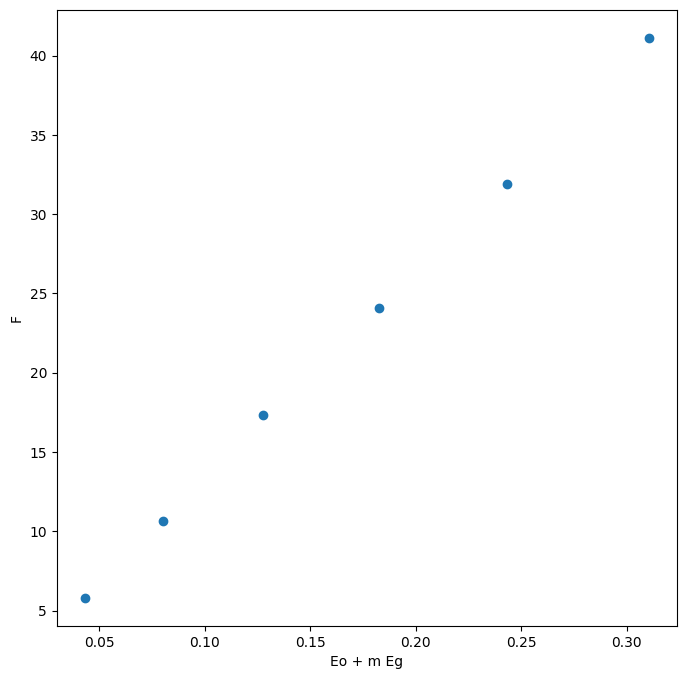

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(Eo+ma*Eg, F)
plt.xlabel('Eo + m Eg')
plt.ylabel('F')
slope, intercept, r_value, p_value, std_err = linregress(Eo+ma*Eg, F)
plt.plot(Eo+ma*Eg, slope*(Eo+ma*Eg)+intercept)
plt.title(f'm = {ma}')

3.8

In [4]:
def vogelipr():
    porosity = float(input("Enter Porosity: "))
    K = float(input("Enter Perm.(md): "))
    h = float(input("Enter pay zone thicknes(Feet): "))
    P = float(input("Enter  Reservoir Pressure(psi): "))
    Pb = float(input("Enter Bubble Point Pressure(psi): "))
    Bo = float(input("Enter Formation Volume Factor: "))
    Viscosity  = float(input("Enter fluid viscosity(cp): "))
    ct = float(input("Enter Total Compressibility(psi-1): "))
    A = float(input("Enter Drainage Area(Acres): "))
    re = np.sqrt(43560*A/3.14)
    rw = float(input("Enter Wellbore radius(ft): "))
    S = float(input("Enter Skin Factor: "))
##Calculation of productivity index
    J = K*h/(141.2*Bo*Viscosity*(np.log(re/rw)-0.75+S))
    print("The value of productivity index is", J)
##Calculation of Absolute open flow
    qmax = J*P/1.8
    print("The value of Absolute open flow is ", qmax, "stb/day")
##Pressures array
    a = np.arange(0,P,500)
    b = np.append(a,P)
    pwf = b[-1::-1]
##Calculation of flowrate
    flowrate = [] #empty list for occupying later
    for i in pwf:
        q = qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
        flowrate.append(q)
    flowrates = np.array(flowrate)

##plotting IPR
    plt.figure(figsize = (9,6))
    plt.plot(flowrates,pwf,c = "red",linewidth=3)
    plt.xlabel("Flowrate(stb/day)")
    plt.ylabel("pwf(psia)")
    plt.grid(True)
    plt.title("Vogel's IPR for Saturated Reservoir")

In [ ]:
vogelipr()

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy

In [26]:
#Example: Estimate the formation permeability and skin factor, from the build-up test data given in the following:


Pi = 5048 #psi
tp = 144  #hours
Q = 180  #STB/D
B = 1.163 #RB/STB
U = 2.19 #cp
h = 62 #ft
Poro = 0.215 #frac
Rw =0.26 
Ct = 8.38 ** -6 #1/psi



In [27]:
Time_hr = [ 0,0.005,0.011,0.019,0.029,0.041,0.056,0.075,0.099,0.129,0.166,0.213,0.271,0.344,0.435,0.548,0.691,0.868,1.09,1.368,1.715,2.15,2.69,3.37,4.22,5.27,6.6,8.25,10.32,12.9,16.14,20.17,24]

pressure_pws = [5048, 5167.4, 5265.2, 5339, 5390, 5422.4, 5442, 5453.8, 5461.5, 5467.1, 5471.8, 5476.1, 5480.2, 5484.1, 5488, 5491.8, 5495.6, 5499.3, 5503.2, 5507, 5511, 5515, 5519.1, 5523.3, 5527.7, 5532.2, 5536.8, 5541.5, 5546.3, 5551.2, 5556.2, 5561.1, 5564.9]



In [24]:
d = {
    'Time_hr': [0,0.005,0.011,0.019,0.029,0.041,0.056,0.075,0.099,0.129,0.166,0.213,0.271,0.344,0.435,0.548,0.691,0.868,1.09,1.368,1.715,2.15,2.69,3.37,4.22,5.27,6.6,8.25,10.32,12.9,16.14,20.17,24],
     'pressure_pws': [5048, 5167.4, 5265.2, 5339, 5390, 5422.4, 5442, 5453.8, 5461.5, 5467.1, 5471.8, 5476.1, 5480.2, 5484.1, 5488, 5491.8, 5495.6, 5499.3, 5503.2, 5507, 5511, 5515, 5519.1, 5523.3, 5527.7, 5532.2, 5536.8, 5541.5, 5546.3, 5551.2, 5556.2, 5561.1, 5564.9]
}

df = pd.DataFrame(data=d)
df

<IPython.core.display.Javascript object>

,Time_hr,pressure_pws
0,0.000,5048.0
1,0.005,5167.4
2,0.011,5265.2
3,0.019,5339.0
4,0.029,5390.0
5,0.041,5422.4
6,0.056,5442.0
7,0.075,5453.8
8,0.099,5461.5
9,0.129,5467.1


    Time_hr  pressure_pws  Time Function
0     0.000        5048.0            inf
1     0.005        5167.4   2.880001e+04
2     0.011        5265.2   1.309092e+04
3     0.019        5339.0   7.578966e+03
4     0.029        5390.0   4.965546e+03
5     0.041        5422.4   3.512236e+03
6     0.056        5442.0   2.571485e+03
7     0.075        5453.8   1.920075e+03
8     0.099        5461.5   1.454644e+03
9     0.129        5467.1   1.116408e+03
10    0.166        5471.8   8.676359e+02
11    0.213        5476.1   6.762693e+02
12    0.271        5480.2   5.316363e+02
13    0.344        5484.1   4.189487e+02
14    0.435        5488.0   3.314695e+02
15    0.548        5491.8   2.633217e+02
16    0.691        5495.6   2.090846e+02
17    0.868        5499.3   1.667666e+02
18    1.090        5503.2   1.332001e+02
19    1.368        5507.0   1.066312e+02
20    1.715        5511.0   8.568001e+01
21    2.150        5515.0   6.912674e+01
22    2.690        5519.1   5.622160e+01
23    3.370     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ValueError: x and y must be the same size

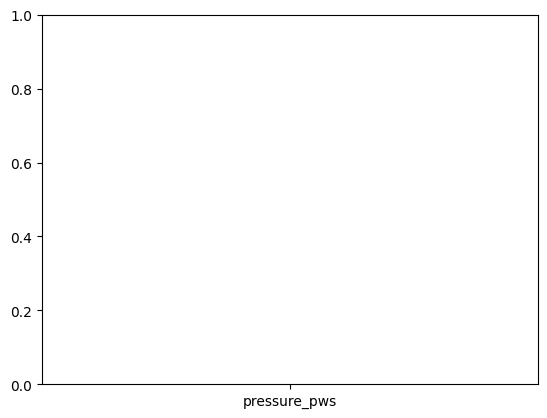

In [48]:
df['Time Function'] = df['Time_hr'] + (tp / df['Time_hr'])



print(df)




In [6]:
reservoirdata = {
    'pressure': [3600 , 3200 , 2800 , 2500 , 2400 , 1800 , 1200 , 600 , 200],
     'solutiongas': [567, 567 , 567, 567 , 554, 436, 337, 223 , 143 ],
      'formation-volume-factor' : [1.31 , 1.317 , 1.325 , 1.333 , 1.31 , 1.263 , 1.21 , 1.14 , 1.07]
}

df = pd.DataFrame(data=reservoirdata)
df


<IPython.core.display.Javascript object>

,pressure,solutiongas,formation-volume-factor
0,3600,567,1.310
1,3200,567,1.317
2,2800,567,1.325
3,2500,567,1.333
4,2400,554,1.310
5,1800,436,1.263
6,1200,337,1.210
7,600,223,1.140
8,200,143,1.070


In [7]:
df.head()

,pressure,solutiongas,formation-volume-factor
0,3600,567,1.310
1,3200,567,1.317
2,2800,567,1.325
3,2500,567,1.333
4,2400,554,1.310


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

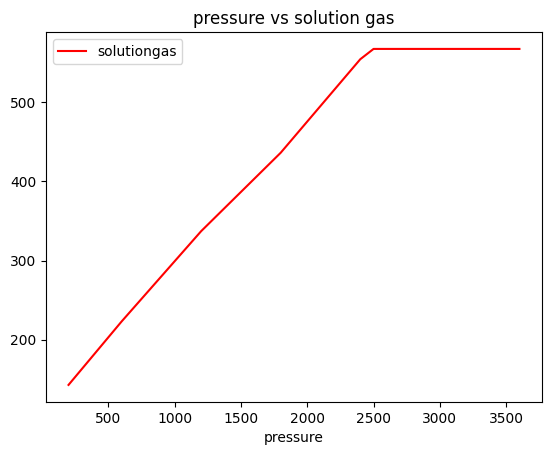

In [14]:
# scatter plot
df.plot(kind = 'line',
        x = 'pressure',
        y = 'solutiongas',
        color = 'red')
  
# set the title
plt.title('pressure vs solution gas')
  
# show the plot
plt.show()

In [35]:
# scatter plot
df.plot(kind = 'line',
        x = 'pressure',
        y = 'formation-volume-factor',
        color = 'blue')
  
# set the title
plt.title('formation-volume-factor vs pressure')
  
# show the plot
plt.show()

KeyError: 'formation-volume-factor'

TypeError: 'AxesSubplot' object is not subscriptable

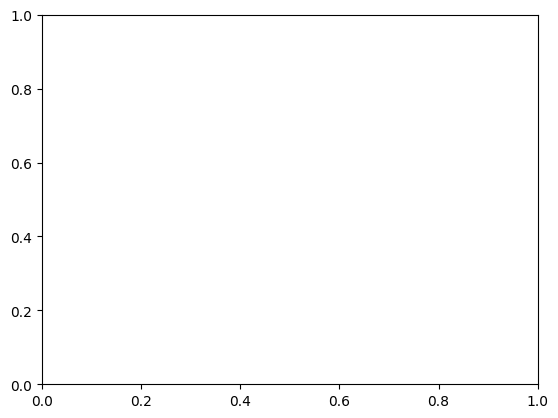

In [33]:
ax = plt.gca() 
  
# line plot for math marks
df.plot(kind = 'line',
        x = 'pressure',
        y = 'formation-volume-factor',
        color = 'green',ax = axes[0,0])
  
# line plot for physics marks
df.plot(kind = 'line',x = 'pressure',
        y = 'solutiongas',
        color = 'blue',ax = axes[0,1])
  

  

plt.title('LinePlots')
  
# show the plot
plt.show()

In [31]:
%matplotlib inline

<AxesSubplot:>

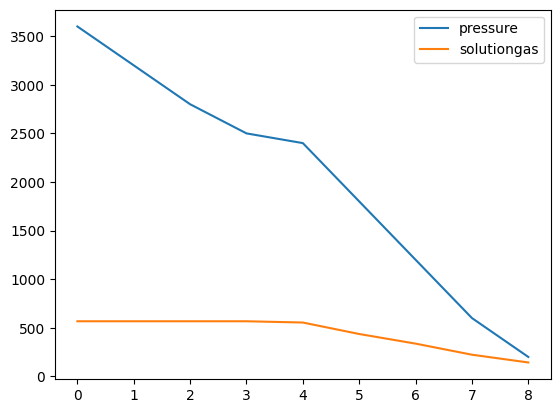

In [34]:
df.plot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

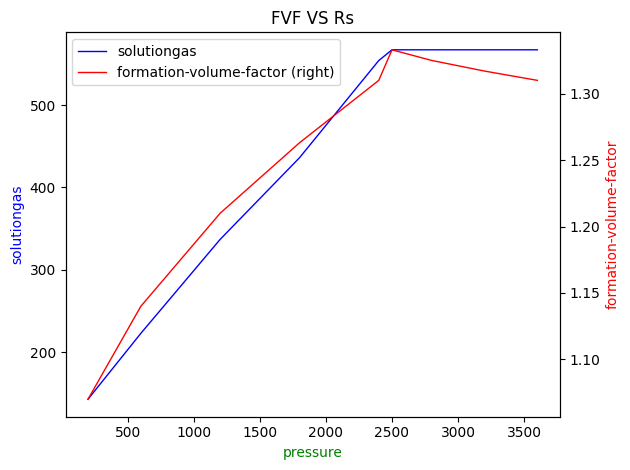

In [2]:
#example from applied reservoir engineering book 
dataset = pd.DataFrame({'pressure':[3600 , 3200 , 2800 , 2500 , 2400 , 1800 , 1200 , 600 , 200],
                         
                   'solutiongas': [567, 567 , 567, 567 , 554, 436, 337, 223 , 143 ],
      'formation-volume-factor' : [1.31 , 1.317 , 1.325 , 1.333 , 1.31 , 1.263 , 1.21 , 1.14 , 1.07]})
# creating axes object and defining plot
ax = dataset.plot(kind = 'line', x = 'pressure',
                  y = 'solutiongas', color = 'Blue',
                  linewidth = 1)
 
ax2 = dataset.plot(kind = 'line', x = 'pressure',
                   y = 'formation-volume-factor', secondary_y = True,
                   color = 'Red',  linewidth = 1,
                   ax = ax)
#title of the plot
plt.title("FVF VS Rs")
#labeling x and y-axis
ax.set_xlabel('pressure', color = 'g')
ax.set_ylabel('solutiongas', color = "b")
ax2.set_ylabel('formation-volume-factor', color = 'r')
 
#defining display layout
plt.tight_layout()
#show plot
plt.show()